# Virginia Beach's Fire Department - Data Analysis

The following analysis was done as one of two possible options for the Final Project of CSCI 140 - Programming for Data Science (taught by Professor Dana Willner) in Fall 2017.

The data used for this project contains information on all reported incidents that were responded to by the Virginia Beach Fire Department. It is public available at https://data.vbgov.com/Public-Safety/Fire-Calls-For-Service/99cx-evsk and is updated weekly. This analysis was done using data downloaded on 27 November 2017.

As part of this project, the data was reformatted to allow for some analysis and visualization.

# Setting up the workspace and importing the data

In [1]:
% matplotlib inline
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from geopy.geocoders import Nominatim
import re
import matplotlib.pyplot as plt
import numpy as np
import folium
import string
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 50) #This allows me to see all of the columns

Reading in the data from the data file:

In [2]:
fire = pd.read_csv('Fire_Calls_For_Service.csv')

/Users/Daniel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's first look at the data.

In [3]:
fire.head()

,Incident ID,Incident Type,Call Date and Time,Dispatch Date and Time,En Route Date and Time,On Scene Date and Time,Close Date and Time,Incident Location,Exposure Number,Battalion,Station Area,Fire Suppression Units,Fire Suppression Personnel,First Unit on Scene,Estimated Property Loss,Estimated Contents Loss,Fire Personnel Fatalities,Fire Personnel Injuries,Civilian Fatalities,Civilian Injuries,Action Taken - Primary,Action Taken - Secondary,Action Taken - Other,Property Type,Detector,Detector Alerted Occupants,Area of Fire Origin,Ignition Cause,Ignition Factor Primary,Ignition Factor Secondary,Heat Source,Item First Ignited,Human Factor,Structure Type,Structure Status,Floor of Fire Origin,Automatic Extinguishing System Present,Automatic Extinguishing System Activated,Sprinkler Heads Operating,Location 1
0,2011029006,"Outside rubbish, trash or waste fire",07/21/2011 07:21:17 PM,07/21/2011 07:21:17 PM,07/21/2011 07:22:41 PM,07/21/2011 07:30:19 PM,07/21/2011 08:35:11 PM,100 LONDON BRIDGE RD,0,1.0,ST03,2.0,6.0,E03,NaN,NaN,NaN,NaN,NaN,NaN,Extinguishment by fire service personnel,NaN,NaN,"Bridge, trestle",NaN,NaN,NaN,Intentional,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,"100 LONDON BRIDGE RD\nVIRGINIA BEACH, VA 23453..."
1,2015022806,"Cooking fire, confined to container",05/29/2015 05:51:46 PM,05/29/2015 05:52:28 PM,05/29/2015 05:53:22 PM,05/29/2015 05:57:21 PM,05/29/2015 06:01:01 PM,400 SOUTHGATE AV,0,2.0,ST07,1.0,4.0,E07,$0.00,$0.00,NaN,NaN,NaN,NaN,Investigate,NaN,NaN,1 or 2 family dwelling,NaN,NaN,NaN,Unintentional,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,"400 SOUTHGATE AV\nVIRGINIA BEACH, VA 23462-\n(..."
2,2011030623,Public service,07/31/2011 02:53:21 PM,07/31/2011 02:53:21 PM,07/31/2011 02:53:21 PM,07/31/2011 02:53:21 PM,07/31/2011 03:02:59 PM,1400 NIMMO PW,0,4.0,ST21,NaN,NaN,E21,$0.00,$0.00,NaN,NaN,NaN,NaN,"Assistance, other",NaN,NaN,Fire station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,"1400 NIMMO PW\nVIRGINIA BEACH, VA 23456-\n(36...."
3,2015052331,Public service,11/24/2015 01:02:52 PM,11/24/2015 01:02:52 PM,11/24/2015 01:02:52 PM,11/24/2015 01:02:52 PM,11/24/2015 01:03:22 PM,4500 MAIN ST,0,2.0,ST07,NaN,NaN,L07,$0.00,$0.00,NaN,NaN,NaN,NaN,"Assistance, other",NaN,NaN,"Street, other",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,"4500 MAIN ST\nVIRGINIA BEACH, VA 23456\n(36.84..."
4,2015014048,Public service,04/04/2015 12:38:29 PM,04/04/2015 12:38:29 PM,04/04/2015 12:38:29 PM,04/04/2015 12:38:29 PM,04/04/2015 12:39:44 PM,1400 NIMMO PW,0,4.0,ST21,1.0,4.0,E21,$0.00,$0.00,NaN,NaN,NaN,NaN,"Assistance, other",NaN,NaN,Fire station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,"1400 NIMMO PW\nVIRGINIA BEACH, VA 23456\n(36.7..."


From this, it is evident that each row/observation represents a particular incident.

# Assigned tasks for this project

1. Determine the Top 10 most common primary actions for which the fire department was called.
2. Conduct some data exploration with regards to Estimated Property Loss in the year 2015.
3. Create 2 maps to look at geographic patterns in fire reported incidents for the year 2016.

But first, time for some data cleaning and reformatting!

# Data cleaning and reformatting

First, I eliminated all spaces from the column names.

In [4]:
fire.columns = fire.columns.str.replace(' ', '')
fire.head()

,IncidentID,IncidentType,CallDateandTime,DispatchDateandTime,EnRouteDateandTime,OnSceneDateandTime,CloseDateandTime,IncidentLocation,ExposureNumber,Battalion,StationArea,FireSuppressionUnits,FireSuppressionPersonnel,FirstUnitonScene,EstimatedPropertyLoss,EstimatedContentsLoss,FirePersonnelFatalities,FirePersonnelInjuries,CivilianFatalities,CivilianInjuries,ActionTaken-Primary,ActionTaken-Secondary,ActionTaken-Other,PropertyType,Detector,DetectorAlertedOccupants,AreaofFireOrigin,IgnitionCause,IgnitionFactorPrimary,IgnitionFactorSecondary,HeatSource,ItemFirstIgnited,HumanFactor,StructureType,StructureStatus,FloorofFireOrigin,AutomaticExtinguishingSystemPresent,AutomaticExtinguishingSystemActivated,SprinklerHeadsOperating,Location1
0,2011029006,"Outside rubbish, trash or waste fire",07/21/2011 07:21:17 PM,07/21/2011 07:21:17 PM,07/21/2011 07:22:41 PM,07/21/2011 07:30:19 PM,07/21/2011 08:35:11 PM,100 LONDON BRIDGE RD,0,1.0,ST03,2.0,6.0,E03,NaN,NaN,NaN,NaN,NaN,NaN,Extinguishment by fire service personnel,NaN,NaN,"Bridge, trestle",NaN,NaN,NaN,Intentional,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,"100 LONDON BRIDGE RD\nVIRGINIA BEACH, VA 23453..."
1,2015022806,"Cooking fire, confined to container",05/29/2015 05:51:46 PM,05/29/2015 05:52:28 PM,05/29/2015 05:53:22 PM,05/29/2015 05:57:21 PM,05/29/2015 06:01:01 PM,400 SOUTHGATE AV,0,2.0,ST07,1.0,4.0,E07,$0.00,$0.00,NaN,NaN,NaN,NaN,Investigate,NaN,NaN,1 or 2 family dwelling,NaN,NaN,NaN,Unintentional,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,"400 SOUTHGATE AV\nVIRGINIA BEACH, VA 23462-\n(..."
2,2011030623,Public service,07/31/2011 02:53:21 PM,07/31/2011 02:53:21 PM,07/31/2011 02:53:21 PM,07/31/2011 02:53:21 PM,07/31/2011 03:02:59 PM,1400 NIMMO PW,0,4.0,ST21,NaN,NaN,E21,$0.00,$0.00,NaN,NaN,NaN,NaN,"Assistance, other",NaN,NaN,Fire station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,"1400 NIMMO PW\nVIRGINIA BEACH, VA 23456-\n(36...."
3,2015052331,Public service,11/24/2015 01:02:52 PM,11/24/2015 01:02:52 PM,11/24/2015 01:02:52 PM,11/24/2015 01:02:52 PM,11/24/2015 01:03:22 PM,4500 MAIN ST,0,2.0,ST07,NaN,NaN,L07,$0.00,$0.00,NaN,NaN,NaN,NaN,"Assistance, other",NaN,NaN,"Street, other",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,"4500 MAIN ST\nVIRGINIA BEACH, VA 23456\n(36.84..."
4,2015014048,Public service,04/04/2015 12:38:29 PM,04/04/2015 12:38:29 PM,04/04/2015 12:38:29 PM,04/04/2015 12:38:29 PM,04/04/2015 12:39:44 PM,1400 NIMMO PW,0,4.0,ST21,1.0,4.0,E21,$0.00,$0.00,NaN,NaN,NaN,NaN,"Assistance, other",NaN,NaN,Fire station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,"1400 NIMMO PW\nVIRGINIA BEACH, VA 23456\n(36.7..."


I then worked on obtaining the year in which each incident occurred. I noticed that the first four digits of the Incident ID was the year in which the incident occurred, so I did some manipulation to extract it out.

In [5]:
fire['IncidentID'].dtype

dtype('int64')

Since IncidentID is of type int64, instead of using string splicing, I used basic arithmetic operations to extract out the Year.

In [6]:
fire['Year'] = fire['IncidentID'] // 1000000
fire['Year'].value_counts()

2016    46016
2015    43925
2014    40760
2013    40264
2017    39117
2012    39052
2011    16807
2010       14
Name: Year, dtype: int64

It seems that the earliest recorded incident in the dataset is from 2010.

I then cast IncidentID to be of type string and set it to be the new index.

In [7]:
fire['IncidentID'] = fire['IncidentID'].astype(str)
fire.set_index('IncidentID', inplace = True)

fire.head() #Verifying that set_index worked

,IncidentType,CallDateandTime,DispatchDateandTime,EnRouteDateandTime,OnSceneDateandTime,CloseDateandTime,IncidentLocation,ExposureNumber,Battalion,StationArea,FireSuppressionUnits,FireSuppressionPersonnel,FirstUnitonScene,EstimatedPropertyLoss,EstimatedContentsLoss,FirePersonnelFatalities,FirePersonnelInjuries,CivilianFatalities,CivilianInjuries,ActionTaken-Primary,ActionTaken-Secondary,ActionTaken-Other,PropertyType,Detector,DetectorAlertedOccupants,AreaofFireOrigin,IgnitionCause,IgnitionFactorPrimary,IgnitionFactorSecondary,HeatSource,ItemFirstIgnited,HumanFactor,StructureType,StructureStatus,FloorofFireOrigin,AutomaticExtinguishingSystemPresent,AutomaticExtinguishingSystemActivated,SprinklerHeadsOperating,Location1,Year
IncidentID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011029006,"Outside rubbish, trash or waste fire",07/21/2011 07:21:17 PM,07/21/2011 07:21:17 PM,07/21/2011 07:22:41 PM,07/21/2011 07:30:19 PM,07/21/2011 08:35:11 PM,100 LONDON BRIDGE RD,0,1.0,ST03,2.0,6.0,E03,NaN,NaN,NaN,NaN,NaN,NaN,Extinguishment by fire service personnel,NaN,NaN,"Bridge, trestle",NaN,NaN,NaN,Intentional,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,"100 LONDON BRIDGE RD\nVIRGINIA BEACH, VA 23453...",2011
2015022806,"Cooking fire, confined to container",05/29/2015 05:51:46 PM,05/29/2015 05:52:28 PM,05/29/2015 05:53:22 PM,05/29/2015 05:57:21 PM,05/29/2015 06:01:01 PM,400 SOUTHGATE AV,0,2.0,ST07,1.0,4.0,E07,$0.00,$0.00,NaN,NaN,NaN,NaN,Investigate,NaN,NaN,1 or 2 family dwelling,NaN,NaN,NaN,Unintentional,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,"400 SOUTHGATE AV\nVIRGINIA BEACH, VA 23462-\n(...",2015
2011030623,Public service,07/31/2011 02:53:21 PM,07/31/2011 02:53:21 PM,07/31/2011 02:53:21 PM,07/31/2011 02:53:21 PM,07/31/2011 03:02:59 PM,1400 NIMMO PW,0,4.0,ST21,NaN,NaN,E21,$0.00,$0.00,NaN,NaN,NaN,NaN,"Assistance, other",NaN,NaN,Fire station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,"1400 NIMMO PW\nVIRGINIA BEACH, VA 23456-\n(36....",2011
2015052331,Public service,11/24/2015 01:02:52 PM,11/24/2015 01:02:52 PM,11/24/2015 01:02:52 PM,11/24/2015 01:02:52 PM,11/24/2015 01:03:22 PM,4500 MAIN ST,0,2.0,ST07,NaN,NaN,L07,$0.00,$0.00,NaN,NaN,NaN,NaN,"Assistance, other",NaN,NaN,"Street, other",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,"4500 MAIN ST\nVIRGINIA BEACH, VA 23456\n(36.84...",2015
2015014048,Public service,04/04/2015 12:38:29 PM,04/04/2015 12:38:29 PM,04/04/2015 12:38:29 PM,04/04/2015 12:38:29 PM,04/04/2015 12:39:44 PM,1400 NIMMO PW,0,4.0,ST21,1.0,4.0,E21,$0.00,$0.00,NaN,NaN,NaN,NaN,"Assistance, other",NaN,NaN,Fire station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,"1400 NIMMO PW\nVIRGINIA BEACH, VA 23456\n(36.7...",2015


Time to reformat some of the data! First, I convert estimated property loss to be of type float.

In [8]:
fire['EstimatedPropertyLoss'] = fire['EstimatedPropertyLoss'].str.replace('$','')
fire['EstimatedPropertyLoss'] = fire['EstimatedPropertyLoss'].astype(float)

To create the maps, I need to extract out the latitude and longitude coordinates from the Location1 series.

To do this, I first defined two new functions and used regular expression to extract out both coordinates. Under this method, re.findall('-?\d+\.\d+', arg) would be a list of length 2, with the first element being the latitude and the second element being the longitude.

In [9]:
def coordinates_lat(arg):
    re.findall('-?\d+\.\d+', arg)
    if(len(re.findall('(-?\d+\.\d+)', arg)) == 2): #Check if re.findall('(-?\d+\.\d+)', arg) does what it should.
        return re.findall('(-?\d+\.\d+)', arg)[0]
    else:
        return np.nan

def coordinates_long(arg):
    re.findall('-?\d+\.\d+', arg)
    if(len(re.findall('(-?\d+\.\d+)', arg)) == 2): #Check if re.findall('(-?\d+\.\d+)', arg) does what it should.
        return re.findall('(-?\d+\.\d+)', arg)[1]
    else:
        return np.nan

#I then applied the functions to the Location1 Series.
fire['Latitude'] = fire['Location1'].apply(coordinates_lat)
fire['Longitude'] = fire['Location1'].apply(coordinates_long)

Finally, I dropped observations that had missing values in the variables of interest. I decided against dropping null values of latitude and longitude until after I needed to use them for mapping. This is because they could still be used in the first data analysis and visualisation exercise.

In [10]:
fire.dropna(axis = 0, subset = ['IncidentType', 'Location1', 'PropertyType', \
                                       'StationArea', 'ActionTaken-Primary', 'EstimatedPropertyLoss'], inplace = True)

# 1) Determine the Top 10 most common primary actions for which the fire department was called.

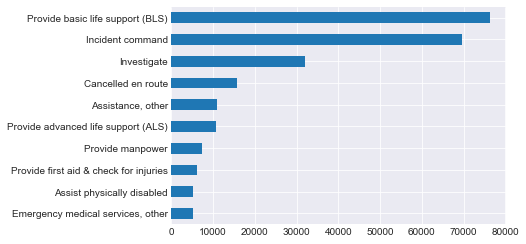

In [11]:
primaryfire = fire['ActionTaken-Primary'].value_counts()
primaryfire[9::-1].plot(kind = 'barh')

Interestingly, fire-related incidents do not appear in the Top 10 most common primary actions for which the fire department is called!

# 2) Conduct some data exploration with regards to Estimated Property Loss in the year 2015.

# Data analysis and visualization 2: Property loss

I first subsetted the data for the year 2015 and looked at some summary statistics regarding estimated property loss.

In [12]:
fire_2015 = fire[fire['Year'] == 2015]
fire_2015['EstimatedPropertyLoss'].describe()

count    4.384300e+04
mean     3.707402e+02
std      1.484761e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.519500e+06
Name: EstimatedPropertyLoss, dtype: float64

Judging by the summary statistics, it appears that most incidents do not involve any property loss. To confirm this, I generated a plot of the distribution of the estimated property loss.

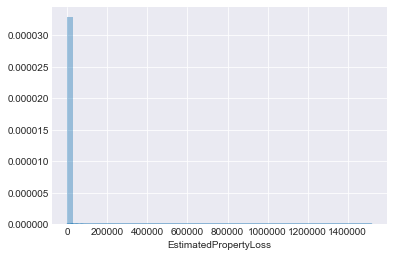

In [13]:
sns.distplot(fire_2015['EstimatedPropertyLoss'])

I then dropped any observations with an estimated properly loss os $0 and recalculated the summary statistics.

In [14]:
fire_2015_prop_loss = fire_2015[fire_2015['EstimatedPropertyLoss'] != 0]
fire_2015_prop_loss['EstimatedPropertyLoss'].describe()

count    5.070000e+02
mean     3.205989e+04
std      1.344727e+05
min      1.000000e+00
25%      5.000000e+02
50%      2.500000e+03
75%      1.000000e+04
max      1.519500e+06
Name: EstimatedPropertyLoss, dtype: float64

I also generated a plot of the distribution of estimated property loss.

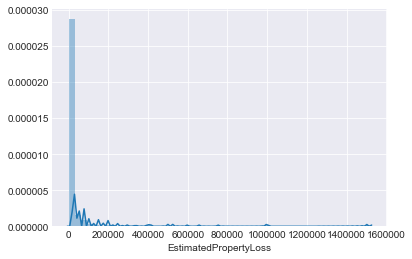

In [15]:
sns.distplot(fire_2015_prop_loss['EstimatedPropertyLoss'])

As the previous summary statistics indicate, the maximum property loss in 2015 was $1,519,500. Let's see which station area responded to that incident.

In [16]:
fire_2015_prop_loss[fire_2015_prop_loss['EstimatedPropertyLoss'] == np.max(fire_2015_prop_loss['EstimatedPropertyLoss'])]['StationArea']

IncidentID
2015016957    ST01
Name: StationArea, dtype: object

Let's take a closer look at that particular incident.

In [17]:
fire_2015_prop_loss[fire_2015_prop_loss['EstimatedPropertyLoss'] == np.max(fire_2015_prop_loss['EstimatedPropertyLoss'])]

,IncidentType,CallDateandTime,DispatchDateandTime,EnRouteDateandTime,OnSceneDateandTime,CloseDateandTime,IncidentLocation,ExposureNumber,Battalion,StationArea,FireSuppressionUnits,FireSuppressionPersonnel,FirstUnitonScene,EstimatedPropertyLoss,EstimatedContentsLoss,FirePersonnelFatalities,FirePersonnelInjuries,CivilianFatalities,CivilianInjuries,ActionTaken-Primary,ActionTaken-Secondary,ActionTaken-Other,PropertyType,Detector,DetectorAlertedOccupants,AreaofFireOrigin,IgnitionCause,IgnitionFactorPrimary,IgnitionFactorSecondary,HeatSource,ItemFirstIgnited,HumanFactor,StructureType,StructureStatus,FloorofFireOrigin,AutomaticExtinguishingSystemPresent,AutomaticExtinguishingSystemActivated,SprinklerHeadsOperating,Location1,Year,Latitude,Longitude
IncidentID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015016957,Building fire,04/23/2015 11:37:32 PM,04/23/2015 11:38:05 PM,04/23/2015 11:39:12 PM,04/23/2015 11:42:50 PM,04/24/2015 05:51:26 AM,2300 PAGE CT,0,2.0,ST01,23.0,65.0,E01,1519500.0,$800000.00,0.0,5.0,NaN,NaN,Extinguishment by fire service personnel,Salvage & overhaul,Search,Multifamily dwelling,Yes,"Detector alerted occupants, occupants responded","Outside area, other",Unintentional,Undetermined,NaN,Undetermined,Undetermined,No,Enclosed building,In normal use,1.0,None Present,NaN,NaN,"2300 PAGE CT\nVIRGINIA BEACH, VA 23451-\n(36.9...",2015,36.910916,-76.081567


That particular incident was a residential building that caught on fire. The fire started outside of the building, and the family living in the building was alerted of the fire and escaped in time, resulting in no civilian casualties. The estimated content loss was \$800,000. The estimated property loss was \$1,519,500.

Let's look at the summary statistics for estimated property loss for that particular station to see if this was a particularly unusual observation.

In [18]:
fire_2015_prop_loss[fire_2015_prop_loss['StationArea'] == 'ST01']['EstimatedPropertyLoss'].describe()

count    1.900000e+01
mean     9.385947e+04
std      3.459804e+05
min      1.000000e+01
25%      8.500000e+02
50%      4.000000e+03
75%      2.750000e+04
max      1.519500e+06
Name: EstimatedPropertyLoss, dtype: float64

In 2015, the mean non-zero property loss of incidents in Station Area 1 was \$93,859, which was higher than the mean non-zero property loss of incidents of all Station Areas (\$32,059). However, the estimated property loss of that one incident is still an anomaly as the property loss of \$1,519,500 is more than three standard deviations (sd = \$345,980.40) away from the mean.

# 3) Create 2 maps to look at geographic patterns in fire reported incidents for the year 2016.

For the first map, I selected data for Fire Station 6 Creeds (Station Area 6) from 2016, excluding any Incident Descriptions that are 'EMS call, excluding vehicle accident with injury' or 'Dispatched & Cancelled en route'.

In [19]:
fire_2016 = fire[(fire['Year'] == 2016) & (fire['StationArea'] == 'ST06')]

fire_2016 = fire_2016.dropna(axis = 0, subset = ['Latitude', 'Longitude'])

fire_2016_drop = fire_2016[~((fire_2016['IncidentType'] == 'EMS call, excluding vehicle accident with injury')\
                             |(fire_2016['IncidentType'] == 'Dispatched & canceled en route'))]

fire_2016_drop['IncidentType'].value_counts()

Cover assignment, standby, moveup                     95
Motor vehicle accident with injuries                  17
Power line down                                       10
Emergency medical service incident, other             10
Medical assist, assist EMS crew                        9
Assist invalid                                         8
Public service                                         6
Wind storm, tornado/hurricane assessment               6
Special type of incident, other                        5
Good intent call, other                                5
Alarm system sounded due to malfunction                4
Motor vehicle accident with no injuries.               4
Police matter                                          4
No incident found on arrival at dispatch address       4
Public service assistance, other                       4
Gas leak (natural gas or LPG)                          3
Unauthorized burning                                   3
Passenger vehicle fire         

I then obtained the geographic coordinates for Creeds Fire Station 6 using the geopy package.

In [20]:
geolocator = Nominatim()
ST06 = 'Creeds Fire Station'
loc = geolocator.geocode(ST06)
print(loc.latitude, loc.longitude)

36.6052778 -76.0266667


I then made a map which shows the station location with a regular marker, and each incident as a red circular marker.

The incident markers tell the type of incident as a popup.

In [21]:
VBeach_coord = (36.8, -76.0)

fire2016_map = folium.Map(location = VBeach_coord, zoom_start = 8)

coords = zip(fire_2016_drop['Latitude'], fire_2016_drop['Longitude'], fire_2016_drop['IncidentType'])

for lat, long, inci in coords:
    folium.CircleMarker(location=[float(lat),float(long)],radius = 3, color = 'red', popup = inci).add_to(fire2016_map)

folium.Marker(location=[loc.latitude, loc.longitude]).add_to(fire2016_map)

fire2016_map

As can be seen from the map, most of the incidents are clustered near the fire station (which makes sense). However, there are 2 incidents which violate this pattern. Details about them are listed below.

In [22]:
fire_2016_drop[fire_2016_drop['IncidentType'] == 'Fires in structure other than in a building']

,IncidentType,CallDateandTime,DispatchDateandTime,EnRouteDateandTime,OnSceneDateandTime,CloseDateandTime,IncidentLocation,ExposureNumber,Battalion,StationArea,FireSuppressionUnits,FireSuppressionPersonnel,FirstUnitonScene,EstimatedPropertyLoss,EstimatedContentsLoss,FirePersonnelFatalities,FirePersonnelInjuries,CivilianFatalities,CivilianInjuries,ActionTaken-Primary,ActionTaken-Secondary,ActionTaken-Other,PropertyType,Detector,DetectorAlertedOccupants,AreaofFireOrigin,IgnitionCause,IgnitionFactorPrimary,IgnitionFactorSecondary,HeatSource,ItemFirstIgnited,HumanFactor,StructureType,StructureStatus,FloorofFireOrigin,AutomaticExtinguishingSystemPresent,AutomaticExtinguishingSystemActivated,SprinklerHeadsOperating,Location1,Year,Latitude,Longitude
IncidentID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016057663,Fires in structure other than in a building,12/09/2016 08:04:42 AM,12/09/2016 08:04:42 AM,12/09/2016 08:07:47 AM,12/09/2016 10:52:22 AM,12/09/2016 07:09:33 PM,9900 HOKE BRADY RD,0,4.0,ST06,1.0,4.0,FBOA06,0.0,$0.00,NaN,NaN,NaN,NaN,Hazardous materials spill control and confinement,Operate apparatus or vehicle,NaN,"Dock, marina, pier, wharf",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,"9900 HOKE BRADY RD\nHENRICO, VA 23231-\n(37.39...",2016,37.392838,-77.361012


In [23]:
fire_2016_drop[(fire_2016_drop['IncidentType'] == 'Watercraft rescue') & (fire_2016_drop['IncidentLocation'].str.contains('PRINCESS'))]

,IncidentType,CallDateandTime,DispatchDateandTime,EnRouteDateandTime,OnSceneDateandTime,CloseDateandTime,IncidentLocation,ExposureNumber,Battalion,StationArea,FireSuppressionUnits,FireSuppressionPersonnel,FirstUnitonScene,EstimatedPropertyLoss,EstimatedContentsLoss,FirePersonnelFatalities,FirePersonnelInjuries,CivilianFatalities,CivilianInjuries,ActionTaken-Primary,ActionTaken-Secondary,ActionTaken-Other,PropertyType,Detector,DetectorAlertedOccupants,AreaofFireOrigin,IgnitionCause,IgnitionFactorPrimary,IgnitionFactorSecondary,HeatSource,ItemFirstIgnited,HumanFactor,StructureType,StructureStatus,FloorofFireOrigin,AutomaticExtinguishingSystemPresent,AutomaticExtinguishingSystemActivated,SprinklerHeadsOperating,Location1,Year,Latitude,Longitude
IncidentID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016020592,Watercraft rescue,05/08/2016 12:48:04 PM,05/08/2016 12:57:45 PM,05/08/2016 12:57:45 PM,05/08/2016 01:09:49 PM,05/08/2016 02:29:23 PM,100 PRINCESS ANNE RD,0,4.0,ST06,3.0,5.0,FBOA06,1900000.0,$100000.00,NaN,NaN,NaN,NaN,Search,"Hazardous condition, other",Incident command,"Lake, river, stream",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,"100 PRINCESS ANNE RD\nKNOTTS ISLAND, NC 27950-...",2016,36.250619,-76.255056


Both incidents involved marine-related incidents. Based on the description of Creeds Fire Station (available at: https://www.vbgov.com/government/departments/fire/fire-station/Pages/Station-6---Creeds.aspx), this was probably the closest of the 3 fire stations that had Marine Response Teams and were thus adequately equipped to deal with the incidents.

For the second map, I plotted the distribution of all incidents that contained the word 'bomb'.

In [24]:
fire['IncidentType'] = fire['IncidentType'].str.lower()

bomb = fire['IncidentType'].str.contains('bomb')

fire_bomb = fire[bomb]

fire_bomb = fire_bomb.dropna(axis = 0, subset = ['Latitude', 'Longitude']) #Drop NA values in Lat/Long

fire_bomb['IncidentType'].value_counts()

bomb scare - no bomb                                 158
explosive, bomb removal (for bomb scare, use 721)     27
munitions or bomb explosion (no fire)                  3
Name: IncidentType, dtype: int64

For this map, each point was colored in for the type of bomb related incident.

In [25]:
VBeach_coord = (36.8, -76.0)

bomb_map = folium.Map(location = VBeach_coord, zoom_start = 8)

colors = {'bomb scare - no bomb': 'green', 'explosive, bomb removal (for bomb scare, use 721)': 'red',\
         'munitions or bomb explosion (no fire)': 'yellow'}

bombs_coords = zip(fire_bomb['Latitude'], fire_bomb['Longitude'], fire_bomb['IncidentType'])

for lat, long, inci in bombs_coords:
    folium.CircleMarker(location=[float(lat),float(long)],radius = 3, color = colors[inci]).add_to(bomb_map)

bomb_map

Public areas seem to have a high concentration of bomb scare incidents. Given the high volume of human traffic in public areas, it is likely that any potential bomber would target those areas, which results in more false positives being reported to the Virginia Beach Fire Department.

Conversely, areas where there are few buildings (e.g. State Parks, Back Bay National Wildlife Refuge) as well as the area near the Naval Air Station are devoid of such incidents. For the former, given that bombers seek to maximize the number of civilian casualties, they would only target high population density areas and not wide, natural spaces that are devoid of people. For the latter, there is presumably be a lot of security near the area, thereby discouraging potential bombers.